In [45]:
import tensorflow as tf 
from tensorflow import keras
from sklearn import preprocessing, model_selection
import numpy as np 
import pandas as pd 



In [47]:
df = pd.read_csv('beta.csv')
df.head()

,#,title,user_rating,critic_rating,platform
0,0,beat saber,76.0,93,0
1,1,red dead redemption 2,48.0,93,0
2,2,final fantasy xiv: shadowbringers,90.0,91,0
3,3,disco elysium,83.0,91,0
4,4,tetris effect,67.0,90,0


In [41]:
df.tail()

,#,title,user_rating,critic_rating,platform
1182,236,the grand tour game,70.0,52,3
1183,240,generation zero,60.0,50,3
1184,244,power rangers: battle for the grid,60.0,48,3
1185,246,monster jam steel titans,40.0,47,3
1186,248,wwe 2k20,11.0,45,3


In [49]:
df.corr()

,#,user_rating,critic_rating,platform
#,1.000000,-0.365363,-0.893220,-0.085543
user_rating,-0.365363,1.000000,0.451745,0.074972
critic_rating,-0.893220,0.451745,1.000000,0.028682
platform,-0.085543,0.074972,0.028682,1.000000


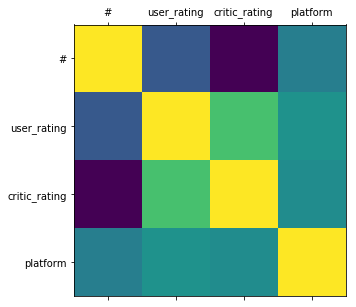

In [50]:
import matplotlib.pyplot as plt

def plot_corr(df):
    corr = df.corr()
    fig,ax = plt.subplots(figsize = (5,5))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)),corr.columns)
    plt.yticks(range(len(corr.columns)),corr.columns)
    
    
plot_corr(df) 

In [53]:
pc = len(df.loc[df['platform'] == 0])
ps4 = len(df.loc[df['platform'] == 1])
switch = len(df.loc[df['platform'] == 2])
xbox = len(df.loc[df['platform'] == 3])


print("PC = {} ".format(pc))
print("Playstation 4  = {} ".format(ps4))
print("Nintendo Switch = {} ".format(switch))
print("Xbox = {} ".format(xbox))
print("Celkový počet hier v datasete = {} ".format(len(df)))



PC = 327 
Playstation 4  = 310 
Nintendo Switch = 364 
Xbox = 186 
Celkový počet hier v datasete = 1187 


In [56]:
x = np.array(df.drop(['platform', 'title','#'],1))
y = np.array(df['platform'], dtype ='float')   
y.shape = (len(y),1)   

In [57]:
x_train ,x_test , y_train, y_test = model_selection.train_test_split(x,y, test_size = 0.3)

In [58]:
x_f_train = preprocessing.scale(x_train)
x_f_test = preprocessing.scale(x_test)
y_f_train = y_train
y_f_test = y_test

In [63]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(200,activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(300,activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(6,activation = tf.nn.softmax))


model.compile(optimizer = tf.optimizers.Adam(),
       loss = 'sparse_categorical_crossentropy',
       metrics=['accuracy'])

In [64]:
model.fit(x_f_train,y_f_train, epochs = 100)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 830 samples
Epoch 1/100
830/830 [==============================] - 1s 1ms/sample - loss: 1.5425 - accuracy: 0.3542
Epoch 2/100
830/830 [==============================] - 0s 260us/sample - loss: 1.3365 - accuracy: 0.4120
Epoch 3/100
830/830 [==============================] - 0s 202us/sample - loss: 1.3094 - accuracy: 0.3916
Epoch 4/100
830/830 [==============================] - 0s 192us/sample - loss: 1.2940 - accuracy: 0.4012
Epoch 5/100
830/830 [==============================] - 0s 145us/sample - loss: 1.2901 - accuracy: 0.4072
Epoch 6/100
830/830 [==============================] - 0s 208us/sample - loss: 1.2914 - accuracy: 0.4096
Epoch 7/100
830/830 [==============================] - 0s 257us/sample - loss: 1.2961 - accuracy: 0.3952
Epoch 8/100
830/830 [==============================] - 0s 233us/sample - loss: 1.2831 - accuracy: 0.4036
Epoch 9/100
830/830 [==========================

830/830 [==============================] - 0s 213us/sample - loss: 1.2413 - accuracy: 0.4217
Epoch 75/100
830/830 [==============================] - 0s 176us/sample - loss: 1.2427 - accuracy: 0.4277
Epoch 76/100
830/830 [==============================] - 0s 172us/sample - loss: 1.2377 - accuracy: 0.4301
Epoch 77/100
830/830 [==============================] - 0s 167us/sample - loss: 1.2425 - accuracy: 0.4337
Epoch 78/100
830/830 [==============================] - 0s 199us/sample - loss: 1.2424 - accuracy: 0.4301
Epoch 79/100
830/830 [==============================] - 0s 179us/sample - loss: 1.2396 - accuracy: 0.4386
Epoch 80/100
830/830 [==============================] - 0s 178us/sample - loss: 1.2337 - accuracy: 0.4337
Epoch 81/100
830/830 [==============================] - 0s 185us/sample - loss: 1.2375 - accuracy: 0.4373
Epoch 82/100
830/830 [==============================] - ETA: 0s - loss: 1.2333 - accuracy: 0.43 - 0s 170us/sample - loss: 1.2324 - accuracy: 0.4410
Epoch 83/100
830/

In [65]:
val_loss,val_acc = model.evaluate(x_f_test,y_f_test)
print("Loss % = {} , Accuracy % = {} ".format(val_loss*100,val_acc*100))

357/357 [==============================] - 0s 437us/sample - loss: 1.3585 - accuracy: 0.3810
Loss % = 135.8517911253857 , Accuracy % = 38.0952388048172 


Počet hier = 1187


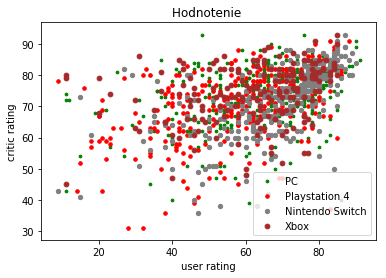

In [108]:
x1 = np.array(df.drop(['title','#'],1))


y1 = np.array(df['platform'], dtype ='float')

y1.shape = (len(y1),1)
c1 =0

for i in range(0,len(x1)):
    print
    if x1[i][2] == 0:
        a = plt.scatter(x1[i][0],x1[i][1], s = 30 , c = 'green', marker = '.')
    elif x1[i][2]== 1:
        b = plt.scatter(x1[i][0],x1[i][1],s = 50 , c = 'red',marker = '.')
    elif x1[i][2]== 2:
        c = plt.scatter(x1[i][0],x1[i][1],s = 75 , c = 'gray',marker = '.')
    elif x1[i][2]== 3:
        d = plt.scatter(x1[i][0],x1[i][1],s = 90 , c = 'brown',marker = '.')             
        
    c1+=1


print("Počet hier = {}".format(c1)) 
plt.xlabel("user rating")
plt.ylabel("critic rating")
plt.title("Hodnotenie ")
plt.legend((a,b,c,d),('PC','Playstation 4','Nintendo Switch','Xbox'))

plt.show()
